# Chicago Taxi Trips Analysis

## Introduccion

In [24]:
#Paso 4. Análisis exploratorio de datos 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

# Cargar los archivos CSV
taxi_data = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
data = pd.read_csv('/datasets/project_sql_result_07.csv')

In [25]:
# Visualizacion de las primeras filas y comprobar las columnas
print(taxi_data.head())
print(dropoff_data.head())

print(taxi_data.info())
print(dropoff_data.info())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  D

In [31]:
# Verificar duplicados en taxi_data
duplicates_taxi = taxi_data.duplicated().sum()
print(f"Duplicados en taxi_data: {duplicates_taxi}")

# Verificar duplicados en dropoff_data
duplicates_dropoff = dropoff_data.duplicated().sum()
print(f"Duplicados en dropoff_data: {duplicates_dropoff}")

# Eliminar duplicados si es necesario
taxi_data = taxi_data.drop_duplicates()
dropoff_data = dropoff_data.drop_duplicates()

# Aqui nos aeguramos que los datos esten correctos despues de limpiar duplicados
taxi_data['trips_amount'] = taxi_data['trips_amount'].astype(int)
dropoff_data['average_trips'] = dropoff_data['average_trips'].astype(float)


Duplicados en taxi_data: 0
Duplicados en dropoff_data: 0


In [27]:
# Ordenar por 'average_trips' y seleccionar los top 10
top_10_neighborhoods = dropoff_data.nlargest(10, 'average_trips')

print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


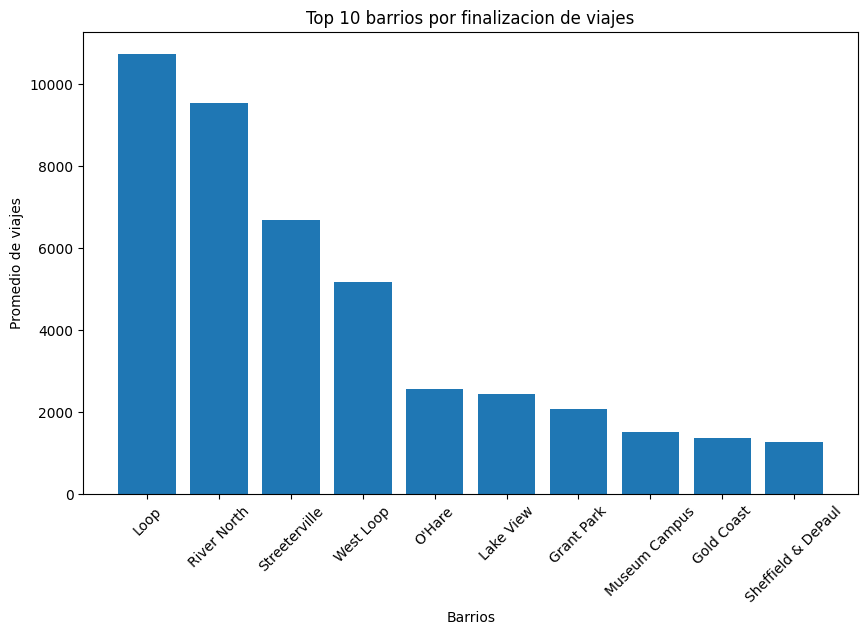

In [28]:
# Grafico para los 10 barrios principales
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.xlabel('Barrios')
plt.ylabel('Promedio de viajes')
plt.title('Top 10 barrios por finalizacion de viajes')
plt.xticks(rotation=45)
plt.show()

# Conclusion

Dado a los resultados presentados desde mi perspectiva dichos datos vendria a ser una herramienta de mucha validez para la planificacion urbana, porque nos da visibilidad en la identificacion de patrones de movilidad llevandonos a la optimizacion de las rutas asi como el analisis de la demanda en ciertas areas clave de Chicago, adicionalmente estos resultados podrian de ser de ayuda para la reduccion de tiempos de desplazamiento y mejorando la eficiencia en la distribucion de recursos.

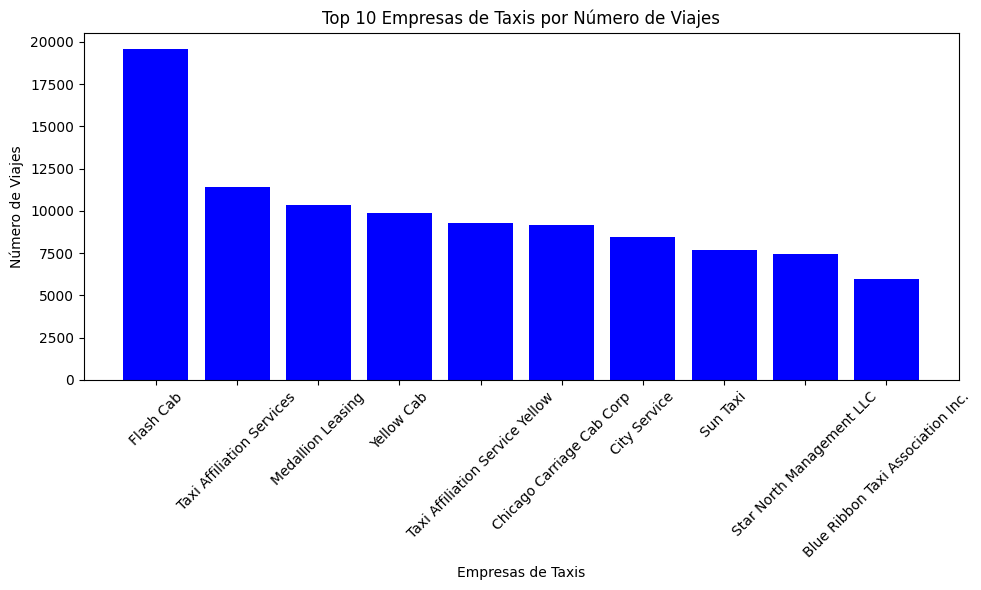

In [29]:
# Ordenar los datos por número de viajes y seleccionar las 10 principales empresas
top_10_companies = taxi_data.sort_values(by='trips_amount', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='blue')
plt.xlabel('Empresas de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Top 10 Empresas de Taxis por Número de Viajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

En base al resultado brindado se puede ver como de Flash Cab va a la cabeza en el número de viajes que desde mi punto de vista se podría deber a varios factores, como una mayor cantidad de vehiculos disponibles, un servicio mas confiable, mayor cobertura geográfica que lo lleva a obtener una reputación sumamente positiva en el mercado. 

Y si detallas las otras compañías muestran una competencia relativamente equilibrada entre si, ahora bien, con dicha informacion nos puede ser de suma importancia para que las empresas competidoras hagan una análisis de sus estrategias operativas y busquen oportunidades de mejora con un buen estudio del mercado que las ayude a ser igual o mejor que Flash Cab.

In [30]:
data['start_ts'] = pd.to_datetime(data['start_ts'])

# Filtrar los datos para sabados
data['day_of_week'] = data['start_ts'].dt.day_name()
saturdays = data[data['day_of_week'] == 'Saturday']

# Dividir los datos en dos grupos: condiciones "Good" y "Bad"
good_conditions = saturdays[saturdays['weather_conditions'] == 'Good']
bad_conditions = saturdays[saturdays['weather_conditions'] == 'Bad']

# Verificar si hay datos suficientes
if good_conditions.empty or bad_conditions.empty:
    print("No hay suficientes datos para realizar un analisis. Verifica las condiciones climaticas en los datos.")
else:
    # Calcular las duraciones promedio
    print("Duracion promedio en sabados con condiciones 'Good':", good_conditions['duration_seconds'].mean())
    print("Duracion promedio en sabados con condiciones 'Bad':", bad_conditions['duration_seconds'].mean())

    # Prueba de Levene para comparar varianzas segun mi compresion 
    stat_levene, p_value_levene = levene(good_conditions['duration_seconds'], bad_conditions['duration_seconds'])
    print("Estadistico de Levene:", stat_levene)
    print("Valor p de Levene:", p_value_levene)

    # Determinar si las varianzas son iguales
    equal_var = p_value_levene > 0.05

    # Prueba t de dos muestras independientes con el resultado de Levene
    stat_ttest, p_value_ttest = ttest_ind(good_conditions['duration_seconds'], bad_conditions['duration_seconds'], equal_var=equal_var)
    print("Estadístico t:", stat_ttest)
    print("Valor p:", p_value_ttest)

    alpha = 0.05
    if p_value_ttest < alpha:
        print("Rechazamos la hipotesis nula: la duracion promedio varia significativamente entre condiciones 'Good' y 'Bad'.")
    else:
        print("No podemos rechazar la hipotesis nula: no hay evidencia suficiente de un cambio significativo.")


Duracion promedio en sabados con condiciones 'Good': 1999.6756756756756
Duracion promedio en sabados con condiciones 'Bad': 2427.2055555555557
Estadistico de Levene: 0.38853489683656073
Valor p de Levene: 0.5332038671974493
Estadístico t: -6.946177714041499
Valor p: 6.517970327099473e-12
Rechazamos la hipotesis nula: la duracion promedio varia significativamente entre condiciones 'Good' y 'Bad'.


1. Cómo planteaste las hipótesis nula y alternativa.

Hipotesis nula consigue o asume que no hay diferencias significativas entre las duraciones promedio de los viajes en sabados con condiciones "good" y "bad". Por lo cual se plantea como punto inicial, ya que nuestro objetivo siempre sera demostrar si existe una diferencia significativa o no.

Ahora bien por el otro lado la hipotesis alternativa: nos presenta que existe una diferencia significativa entre las duraciones promedio de los viajes bajo estas dos condiciones climáticas que ya sabemos (Good o Bad), por lo que nos abre la posibilidad de que las condiciones climáticas afecten la duracion de los viajes como ya los esperado dependiendo de la condicion afecte de manera positiva o negativa.

2. Qué criterio usaste para probar las hipótesis y por qué.

Utilice la prueba estadistica, es decir, una prueba t de dos muestras independientes como razonamiento para comparar las medias de dos grupos como lo son sabados con condiciones "good" y "bad".

Lo encontre el mas adecuado ya que estamos evaluando si las medias de dos grupos son estadisticamente diferentes. Tambien recordar que las observaciones son independientes, es decir, no dependen unas de otras.

# Conclusion

En conclusion dado que el valor p es extremadamente bajo, se rechaza la hipotesis nula. Ya que esto confirma una diferencia significativa en la duracion promedio de los viajes entre condiciones climaticas "good" y "bad", donde las condiciones climaticas impactan directamente en tiempos mas largos o cortos. 

Por ende la importancia de considerar el clima y platear estrategias de transporte para optimizar rutas, tiempos y mejorar la experiencia del usuario, porque si tenemos un usuario feliz la frecias de los viajes dado a la confiabilidad seran cada vez mas frecuentes y aunque aumente las tarifas siempre tomaran nuestro servicios, convirtiendose en un aumento en el revenue.